In [1]:
import argparse
import os
import json
import ROOT as r
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import uproot3
from matplotlib.offsetbox import AnchoredText
from util import make_dirs

Welcome to JupyROOT 6.12/07


/cvmfs/cms.cern.ch/slc7_amd64_gcc700/lcg/root/6.12.07-gnimlf5/lib/ROOT.py:318: DeprecationWarning: Python 2 has reached EOL. mplhep is in a deprecated mode. Please switch to Python 3.
  return _orig_ihook( name, *args, **kwds )


In [2]:
def plotTF_ratio_ggf(in_ratio, mask, region, args=None, zrange=None):
    fig, ax = plt.subplots()

    H = np.ma.masked_where(in_ratio * mask <= 0.01, in_ratio * mask)
    print(H)
    zmin, zmax = np.nanmin(H), np.nanmax(H)
    if zrange is None:
        # Scale clim to fit range up to a max of 0.6                                                          
        clim = np.max([.3, np.min([0.6, 1 - zmin, zmax - 1])])
    else:
        clim = zrange
    ptbins = np.array([450, 500, 550, 600, 675, 800, 1200])
    if 'vbf' in region:
        ptbins = np.array([450,1200])

    msdbins = np.linspace(40, 201, 24)
    hep.hist2dplot(H.T,
                   msdbins,
                   ptbins,
                   vmin=1 - clim,
                   vmax=1 + clim,
                   cmap='RdBu_r',
                   cbar=False)
    cax = hep.make_square_add_cbar(ax, pad=0.2, size=0.5)
    if abs(1 - zmin) > .3 and abs(1 - zmax) > .3:
        c_extend = 'both'
    elif abs(1 - zmin) > .3:
        c_extend = 'min'
    elif abs(1 - zmax) > .3:
        c_extend = 'max'
    else:
        c_extend = 'neither'
    cbar = fig.colorbar(ax.get_children()[0], cax=cax, extend=c_extend)

    ax.set_xticks(np.arange(40, 220, 20))
    ax.tick_params(axis='y', which='minor', left=False, right=False)
    ax.invert_yaxis()

    ax.set_title('{} QCD Ratio'.format(region), pad=15, fontsize=26)
    ax.set_xlabel(r'Jet $\mathrm{m_{SD}}$', ha='right', x=1)
    ax.set_ylabel(r'Jet $\mathrm{p_{T}}$', ha='right', y=1)
    cbar.set_label(r'(Pass QCD) / (Fail QCD * eff)', ha='right', y=1)
    return ax

In [3]:
year = "2018"
f = uproot3.open('fitDiagnosticsTest.root')
g = uproot3.open('signalregion.root')

[[1.1324756  1.0998445  1.0714562  1.0463332  1.0238011  1.0033754
  0.9846954  0.9674864  0.95153326 0.93666524 0.9227439  0.90965605
  0.89730746 0.88561904 0.87452376 0.8639643  0.8538913  0.84426194
  0.8439647  0.84396464 0.84396464 0.8439647  0.8439647 ]
 [1.1548102  1.1221792  1.0937908  1.0686678  1.0461358  1.0257099
  1.00703    0.9898209  0.9738678  0.9589998  0.94507843 0.9319907
  0.9196421  0.9079536  0.8968583  0.88629884 0.87622595 0.86659646
  0.8573733  0.8485234  0.8439647  0.8439646  0.8439647 ]
 [1.1750736  1.1424425  1.1140543  1.0889313  1.0663991  1.0459734
  1.0272936  1.0100844  0.9941314  0.9792632  0.96534204 0.952254
  0.93990546 0.92821705 0.9171217  0.90656227 0.8964892  0.88685995
  0.87763673 0.86878693 0.8602812  0.8520942  0.84420246]
 [1.1962684  1.1636374  1.135249   1.1101259  1.087594   1.0671682
  1.0484885  1.0312793  1.015326   1.000458   0.9865368  0.97344893
  0.9611003  0.94941175 0.93831664 0.92775714 0.91768414 0.9080549
  0.89883167 0.889

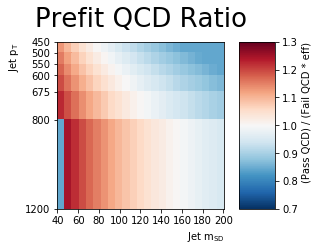

In [4]:
cat = 'ggf'
fail_qcd, pass_qcd = [], []
bins = []

nptbins = 6

for ipt in range(nptbins):
    fail_qcd.append(f['shapes_{}/ptbin{}{}{}{}/qcd;1'.format('prefit', ipt, cat, 'fail', year)].values)
    pass_qcd.append(f['shapes_{}/ptbin{}{}{}{}/qcd;1'.format('prefit', ipt, cat, 'pass', year)].values)

fail_qcd = np.array(fail_qcd)
pass_qcd = np.array(pass_qcd)

mask = ~np.isclose(pass_qcd, np.zeros_like(pass_qcd))
mask *= ~np.isclose(fail_qcd, np.zeros_like(fail_qcd))
q = np.sum(pass_qcd[mask]) / np.sum(fail_qcd[mask])
in_data_rat_prefit = (pass_qcd / (fail_qcd * q))

ax = plotTF_ratio_ggf(in_data_rat_prefit, mask, region="Prefit")
ax.figure.savefig('{}/{}{}_{}.png'.format('plots/', "TF_ratio_", 'ggf2d', year),
                  bbox_inches="tight", dpi=300)
ax.figure.savefig('{}/{}{}_{}.pdf'.format('plots/', "TF_ratio_", 'ggf2d', year),
                  bbox_inches="tight", transparent=True)

[[0.89868146 0.8743586  0.8695366  0.8769397  0.8921891  0.9125281
  0.93616015 0.96188205 0.9888721  1.0165588  1.0445409  1.0725347
  1.1003382  1.1278086  1.1548452  1.1813784  1.2073607  1.2327617
  1.2335544  1.2335542  1.2335542  1.2335544  1.2335544 ]
 [0.92600334 0.88833    0.8736853  0.87373555 0.8834245  0.89954174
  0.9199749  0.9432944  0.9685116  0.99492997 1.0220524  1.0495205
  1.0770739  1.104523   1.131729   1.1585916  1.1850381  1.2110177
  1.2364948  1.2614455  1.2744788  1.2744788  1.2744789 ]
 [0.9592736  0.90760225 0.88256973 0.87476563 0.878444   0.88993055
  0.9067902  0.9273619  0.9504855  0.9753362  1.0013185  1.027997
  1.0550511  1.0822423  1.1093934  1.1363715  1.1630785  1.1894411
  1.2154061  1.2409344  1.2659991  1.2905822  1.3146719 ]
 [1.0045062  0.9359648  0.8983188  0.8808943  0.87713516 0.88282245
  0.89514065 0.9121554  0.93250465 0.95521164 0.97956455 1.0050366
  1.0312355  1.0578649  1.0847013  1.1115737  1.1383529  1.1649395
  1.191258   1.21725

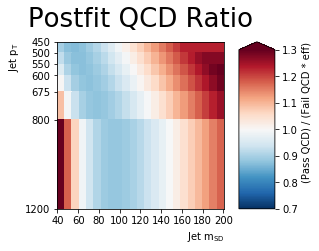

In [5]:
region = 'postfit'
cat = 'ggf'
fail_qcd, pass_qcd = [], []
bins = []

nptbins = 6

for ipt in range(nptbins):
    fail_qcd.append(f['shapes_{}/ptbin{}{}{}{}/qcd;1'.format('fit_s', ipt, cat, 'fail', year)].values)
    pass_qcd.append(f['shapes_{}/ptbin{}{}{}{}/qcd;1'.format('fit_s', ipt, cat, 'pass', year)].values)

fail_qcd = np.array(fail_qcd)
pass_qcd = np.array(pass_qcd)

mask = ~np.isclose(pass_qcd, np.zeros_like(pass_qcd))
mask *= ~np.isclose(fail_qcd, np.zeros_like(fail_qcd))
q = np.sum(pass_qcd[mask]) / np.sum(fail_qcd[mask])
in_data_rat_postfit = (pass_qcd / (fail_qcd * q))

ax = plotTF_ratio_ggf(in_data_rat_postfit, mask, region="Postfit")
ax.figure.savefig('{}/{}{}_{}.png'.format('plots/', "TF_ratio_", 'ggf2d', year),
                  bbox_inches="tight", dpi=300)
ax.figure.savefig('{}/{}{}_{}.pdf'.format('plots/', "TF_ratio_", 'ggf2d', year),
                  bbox_inches="tight", transparent=True)

In [6]:
def plotTF_ratio_onebin(in_ratio, h_ratio, mask, region):
    fig, ax = plt.subplots(figsize=(6,6))
    
    #print(in_ratio)
    
    color = 'blue'
    if 'res' in region:
        color = 'red'
    
    msdbins = np.linspace(40, 201, 24)
    fit = np.array([in_ratio.GetBinContent(i) for i in range(in_ratio.GetNbinsX())])
    fiterr = np.array([in_ratio.GetBinError(i) for i in range(in_ratio.GetNbinsX())])
    fitlow = fit - fiterr
    fithi = fit + fiterr
    

    plt.hist(msdbins[:-1],bins=msdbins,weights=fit,color=color,histtype='step')

    plt.hist(msdbins[:-1],bins=msdbins,weights=fithi,color=color,alpha=0.2,histtype='step',fill=True)
    plt.hist(msdbins[:-1],bins=msdbins,weights=fitlow,color='white',histtype='step',fill=True)
    
    plt.hist(msdbins[:-1],bins=msdbins,weights=fit,color=color,histtype='step')
    
    #hep.histplot(fit,yerr=fiterr,bins=msdbins,color=col)
    #hep.histplot(fit,yerr=fiterr,bins=msdbins,color=color)
    
    data = [h_ratio.GetBinContent(i) for i in range(h_ratio.GetNbinsX())]
    err = [h_ratio.GetBinError(i) for i in range(h_ratio.GetNbinsX())]
    
    hep.histplot(data,yerr=err,bins=msdbins,histtype='errorbar',color='black')

    ax.set_xticks(np.arange(40, 220, 20))
    #ax.tick_params(axis='y', which='minor', left=False, right=False)
    #ax.invert_yaxis()

    ax.set_title(region)
    #ax.set_ylabel(r'Jet $\mathrm{p_{T}}$', ha='right', y=1)
    #ax.legend(labels=['F_{P/F}','QCD pass MC'],frameon=False)
    
    ax.figure.savefig('{}/{}{}_{}.png'.format('plots/', "TF_ratio_", region, year),
                  bbox_inches="tight", dpi=300)
    ax.figure.savefig('{}/{}{}_{}.pdf'.format('plots/', "TF_ratio_", region, year),
                  bbox_inches="tight", transparent=True)
    return ax

/uscms/home/jennetd/.local/lib/python2.7/site-packages/matplotlib/cbook/__init__.py:2484: UserWarning: Saw kwargs [u'ls', u'linestyle'] which are all aliases for u'linestyle'.  Kept value from u'linestyle'
  seen=seen, canon=canonical, used=seen[-1]))


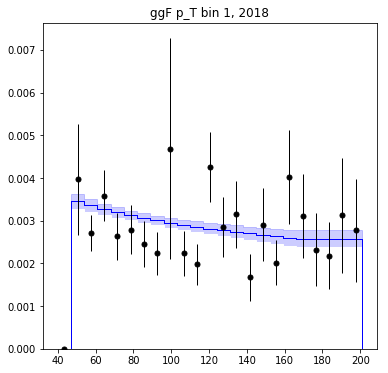

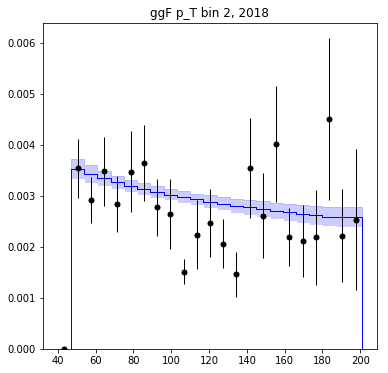

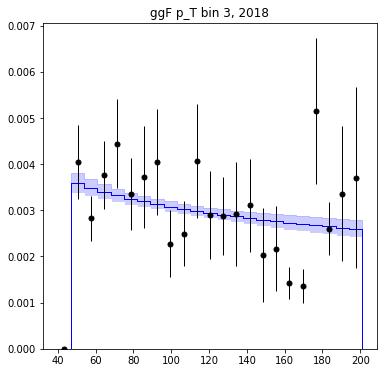

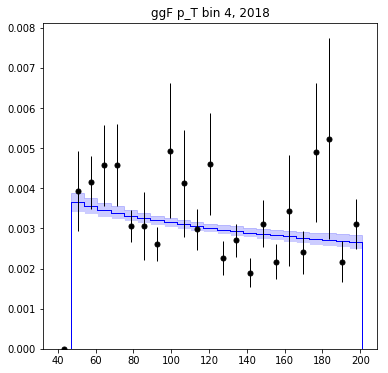

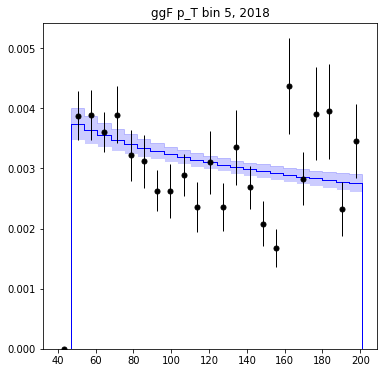

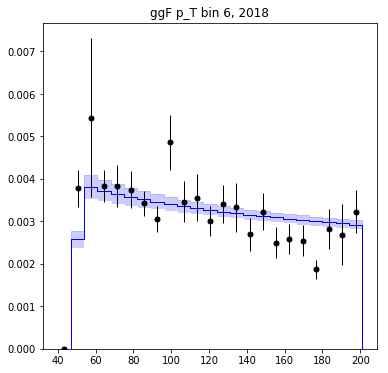

In [7]:
cat = 'ggf'

for ipt in range(6):

    fail_qcd, pass_qcd = [], []
    bins = []
    
    fit = r.TFile.Open('fitDiagnosticsTest.root','READ')
    fail_qcd = fit.Get('shapes_{}/ptbin{}{}{}{}/qcd;1'.format('prefit', ipt, cat, 'fail', year))
    pass_qcd = fit.Get('shapes_{}/ptbin{}{}{}{}/qcd;1'.format('prefit', ipt, cat, 'pass', year))
    pass_qcd.Divide(fail_qcd)

    signalregion = r.TFile.Open('signalregion.root','READ')
    hfail = signalregion.Get('ggf_{}_pt{}_QCD_nominal;1'.format('fail',ipt+1))
    hpass = signalregion.Get('ggf_{}_pt{}_QCD_nominal;1'.format('pass',ipt+1))
    hpass.Divide(hfail)

    ax = plotTF_ratio_onebin(pass_qcd, hpass, mask, region=r'ggF p_T bin '+str(ipt+1)+', '+year)
    #ax.legend(labels=['F_{P/F}','QCD pass MC'],frameon=False)

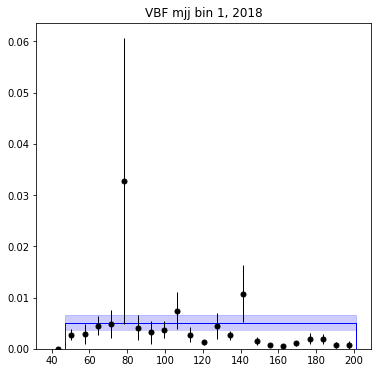

In [8]:
cat = 'vbflo'
fail_qcd, pass_qcd = [], []
bins = []

fit = r.TFile.Open('fitDiagnosticsTest.root','READ')
fail_qcd = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('prefit', cat, 'fail', year))
pass_qcd = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('prefit', cat, 'pass', year))
pass_qcd.Divide(fail_qcd)

signalregion = r.TFile.Open('signalregion.root','READ')
hfail = signalregion.Get('vbf_{}_mjj1_QCD_nominal;1'.format('fail'))
hpass = signalregion.Get('vbf_{}_mjj1_QCD_nominal;1'.format('pass'))
hpass.Divide(hfail)

ax = plotTF_ratio_onebin(pass_qcd, hpass, mask, region="VBF mjj bin 1, "+year)
#ax.legend(labels=['F_{P/F}','QCD pass MC'],frameon=False)

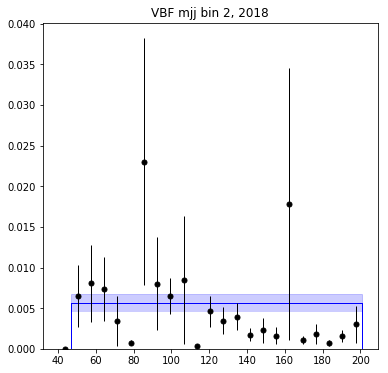

In [9]:
cat = 'vbfhi'
fail_qcd, pass_qcd = [], []
bins = []

fit = r.TFile.Open('fitDiagnosticsTest.root','READ')
fail_qcd = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('prefit', cat, 'fail', year))
pass_qcd = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('prefit', cat, 'pass', year))
pass_qcd.Divide(fail_qcd)

signalregion = r.TFile.Open('signalregion.root','READ')
hfail = signalregion.Get('vbf_{}_mjj2_QCD_nominal;1'.format('fail'))
hpass = signalregion.Get('vbf_{}_mjj2_QCD_nominal;1'.format('pass'))
hpass.Divide(hfail)

ax = plotTF_ratio_onebin(pass_qcd, hpass, mask, region="VBF mjj bin 2, "+year)
#ax.legend(labels=['F_{P/F}','QCD pass MC'],frameon=False)

('Missing hist ', 'shapes_fit_s/ptbin0ggfpass2018/EWKZ')
('Missing hist ', 'shapes_fit_s/ptbin1ggfpass2018/EWKZ')
('Missing hist ', 'shapes_fit_s/ptbin2ggfpass2018/EWKZ')
('Missing hist ', 'shapes_fit_s/ptbin2ggfpass2018/EWKZbb')
('Missing hist ', 'shapes_fit_s/ptbin3ggfpass2018/EWKZ')
('Missing hist ', 'shapes_fit_s/ptbin4ggfpass2018/EWKZ')
('Missing hist ', 'shapes_fit_s/ptbin5ggfpass2018/EWKZ')
('Missing hist', 'shapes_fit_s/ptbin5ggffail2018/EWKZbb')
('Missing hist ', 'shapes_fit_s/ptbin5ggfpass2018/EWKZbb')


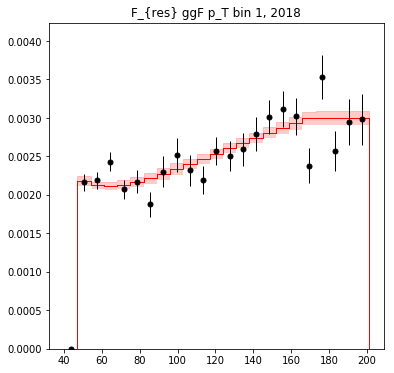

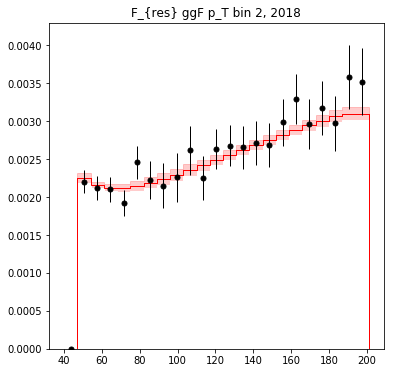

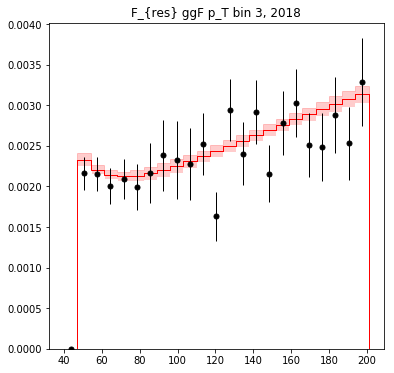

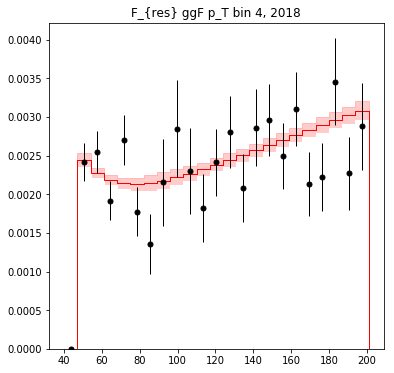

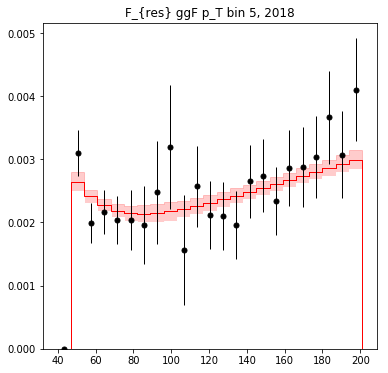

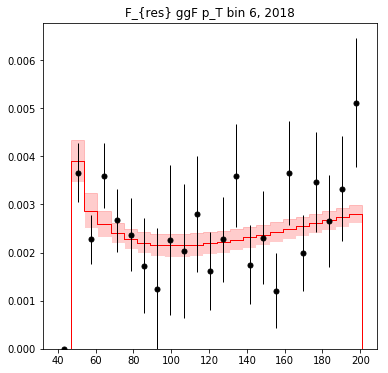

In [10]:
cat = 'ggf'

for ipt in range(6):

    fail_qcd, pass_qcd = [], []
    bins = []
    
    fit = r.TFile.Open('fitDiagnosticsTest.root','READ')
    fail_qcd = fit.Get('shapes_{}/ptbin{}{}{}{}/qcd;1'.format('fit_s', ipt, cat, 'fail', year))
    pass_qcd = fit.Get('shapes_{}/ptbin{}{}{}{}/qcd;1'.format('fit_s', ipt, cat, 'pass', year))
    pass_qcd.Divide(fail_qcd)

    signalregion = r.TFile.Open('signalregion.root','READ')
    hfail = signalregion.Get('ggf_{}_pt{}_data_nominal;1'.format('fail',ipt+1))
    hpass = signalregion.Get('ggf_{}_pt{}_data_nominal;1'.format('pass',ipt+1))
    
    fitDiagnostics = r.TFile.Open('fitDiagnosticsTest.root','READ')
    backgrounds = ['Wjets','Zjets','Zjetsbb','EWKW','EWKZ','EWKZbb',
                   'ttbar','singlet','VV','ggF','VBF','ZH','WH','ttH']
    
    for b in backgrounds:
        try:
            bfail = fitDiagnostics.Get('shapes_{}/ptbin{}{}{}{}/{}'.format('fit_s', ipt, cat, 'fail', year, b))
            bfail.Scale(-7)  
            hfail.Add(bfail)
        except:
            print("Missing hist", 'shapes_{}/ptbin{}{}{}{}/{}'.format('fit_s', ipt, cat, 'fail', year,b))
        try:
            bpass = fitDiagnostics.Get('shapes_{}/ptbin{}{}{}{}/{}'.format('fit_s', ipt, cat, 'pass', year, b))
            bpass.Scale(-7)
            hpass.Add(bpass)
        except: 
            print("Missing hist ",'shapes_{}/ptbin{}{}{}{}/{}'.format('fit_s', ipt, cat, 'pass', year, b))    
        
    hpass.Divide(hfail)

    ax = plotTF_ratio_onebin(pass_qcd, hpass, mask, region=r'F_{res} ggF p_T bin '+str(ipt+1)+', '+year)
    #ax.legend(labels=['F_{res}','Data - non-QCD'],frameon=False)

('Missing hist', 'shapes_fit_s/ptbin5vbflofail2018/Wjets')
('Missing hist ', 'shapes_fit_s/ptbin5vbflopass2018/Wjets')
('Missing hist', 'shapes_fit_s/ptbin5vbflofail2018/Zjets')
('Missing hist ', 'shapes_fit_s/ptbin5vbflopass2018/Zjets')
('Missing hist', 'shapes_fit_s/ptbin5vbflofail2018/Zjetsbb')
('Missing hist ', 'shapes_fit_s/ptbin5vbflopass2018/Zjetsbb')
('Missing hist', 'shapes_fit_s/ptbin5vbflofail2018/EWKW')
('Missing hist ', 'shapes_fit_s/ptbin5vbflopass2018/EWKW')
('Missing hist', 'shapes_fit_s/ptbin5vbflofail2018/EWKZ')
('Missing hist ', 'shapes_fit_s/ptbin5vbflopass2018/EWKZ')
('Missing hist', 'shapes_fit_s/ptbin5vbflofail2018/EWKZbb')
('Missing hist ', 'shapes_fit_s/ptbin5vbflopass2018/EWKZbb')
('Missing hist', 'shapes_fit_s/ptbin5vbflofail2018/ttbar')
('Missing hist ', 'shapes_fit_s/ptbin5vbflopass2018/ttbar')
('Missing hist', 'shapes_fit_s/ptbin5vbflofail2018/singlet')
('Missing hist ', 'shapes_fit_s/ptbin5vbflopass2018/singlet')
('Missing hist', 'shapes_fit_s/ptbin5vbflo

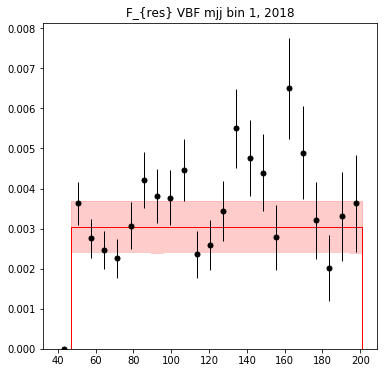

In [11]:
cat = 'vbflo'
fail_qcd, pass_qcd = [], []
bins = []

fit = r.TFile.Open('fitDiagnosticsTest.root','READ')
fail_qcd = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('fit_s', cat, 'fail', year))
pass_qcd = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('fit_s', cat, 'pass', year))
pass_qcd.Divide(fail_qcd)

signalregion = r.TFile.Open('signalregion.root','READ')
hfail = signalregion.Get('vbf_{}_mjj1_data_nominal;1'.format('fail'))
hpass = signalregion.Get('vbf_{}_mjj1_data_nominal;1'.format('pass'))

backgrounds = ['Wjets','Zjets','Zjetsbb','EWKW','EWKZ','EWKZbb',
                   'ttbar','singlet','VV','ggF','VBF','ZH','WH','ttH']

for b in backgrounds:
    try:
        bfail = fitDiagnostics.Get('shapes_{}/ptbin{}{}{}{}/{}'.format('fit_s', ipt, cat, 'fail', year, b))
        bfail.Scale(-7)  
        hfail.Add(bfail)
    except:
        print("Missing hist", 'shapes_{}/ptbin{}{}{}{}/{}'.format('fit_s', ipt, cat, 'fail', year,b))
    try:
        bpass = fitDiagnostics.Get('shapes_{}/ptbin{}{}{}{}/{}'.format('fit_s', ipt, cat, 'pass', year, b))
        bpass.Scale(-7)
        hpass.Add(bpass)
    except: 
        print("Missing hist ",'shapes_{}/ptbin{}{}{}{}/{}'.format('fit_s', ipt, cat, 'pass', year, b))    
        
hpass.Divide(hfail)

ax = plotTF_ratio_onebin(pass_qcd, hpass, mask, region="F_{res} VBF mjj bin 1, "+year)
#ax.legend(labels=['F_{res}','Data - non-QCD'],frameon=False)

('Missing hist', 'shapes_fit_s/ptbin5vbfhifail2018/Wjets')
('Missing hist ', 'shapes_fit_s/ptbin5vbfhipass2018/Wjets')
('Missing hist', 'shapes_fit_s/ptbin5vbfhifail2018/Zjets')
('Missing hist ', 'shapes_fit_s/ptbin5vbfhipass2018/Zjets')
('Missing hist', 'shapes_fit_s/ptbin5vbfhifail2018/Zjetsbb')
('Missing hist ', 'shapes_fit_s/ptbin5vbfhipass2018/Zjetsbb')
('Missing hist', 'shapes_fit_s/ptbin5vbfhifail2018/EWKW')
('Missing hist ', 'shapes_fit_s/ptbin5vbfhipass2018/EWKW')
('Missing hist', 'shapes_fit_s/ptbin5vbfhifail2018/EWKZ')
('Missing hist ', 'shapes_fit_s/ptbin5vbfhipass2018/EWKZ')
('Missing hist', 'shapes_fit_s/ptbin5vbfhifail2018/EWKZbb')
('Missing hist ', 'shapes_fit_s/ptbin5vbfhipass2018/EWKZbb')
('Missing hist', 'shapes_fit_s/ptbin5vbfhifail2018/ttbar')
('Missing hist ', 'shapes_fit_s/ptbin5vbfhipass2018/ttbar')
('Missing hist', 'shapes_fit_s/ptbin5vbfhifail2018/singlet')
('Missing hist ', 'shapes_fit_s/ptbin5vbfhipass2018/singlet')
('Missing hist', 'shapes_fit_s/ptbin5vbfhi

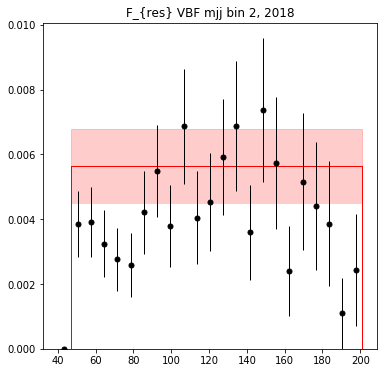

In [12]:
cat = 'vbfhi'
fail_qcd, pass_qcd = [], []
bins = []

fit = r.TFile.Open('fitDiagnosticsTest.root','READ')
fail_qcd = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('prefit', cat, 'fail', year))
pass_qcd = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('prefit', cat, 'pass', year))
pass_qcd.Divide(fail_qcd)

signalregion = r.TFile.Open('signalregion.root','READ')
hfail = signalregion.Get('vbf_{}_mjj2_data_nominal;1'.format('fail'))
hpass = signalregion.Get('vbf_{}_mjj2_data_nominal;1'.format('pass'))

backgrounds = ['Wjets','Zjets','Zjetsbb','EWKW','EWKZ','EWKZbb',
                   'ttbar','singlet','VV','ggF','VBF','ZH','WH','ttH']

for b in backgrounds:
    try:
        bfail = fitDiagnostics.Get('shapes_{}/ptbin{}{}{}{}/{}'.format('fit_s', ipt, cat, 'fail', year, b))
        bfail.Scale(-7)  
        hfail.Add(bfail)
    except:
        print("Missing hist", 'shapes_{}/ptbin{}{}{}{}/{}'.format('fit_s', ipt, cat, 'fail', year,b))
    try:
        bpass = fitDiagnostics.Get('shapes_{}/ptbin{}{}{}{}/{}'.format('fit_s', ipt, cat, 'pass', year, b))
        bpass.Scale(-7)
        hpass.Add(bpass)
    except: 
        print("Missing hist ",'shapes_{}/ptbin{}{}{}{}/{}'.format('fit_s', ipt, cat, 'pass', year, b)) 
     
hpass.Divide(hfail)

ax = plotTF_ratio_onebin(pass_qcd, hpass, mask, region="F_{res} VBF mjj bin 2, "+year)
#ax.legend(labels=['F_{res}','Data - non-QCD'],frameon=False)